In [3]:
import xarray as xr
import geopandas
import regionmask

import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy
cartopy.config['pre_existing_data_dir'] = '/g/data/w42/dr6273/work/data/cartopy-data'
cartopy.config['data_dir'] = '/g/data/w42/dr6273/work/data/cartopy-data'

# Load single instance of ERA5 grid
This is to be used with `regionmask` to create our mask

In [4]:
era5_instance = xr.open_dataset('/g/data/rt52/era5/single-levels/monthly-averaged/2t/2010/2t_era5_moda_sfc_20100101-20100131.nc')

# Load Renewable Energy Zone (REZ) boundaries

In [15]:
rez_file = '/g/data/w42/dr6273/work/data/REZ_boundaries_2021/Indicative_REZ_boundaries_2021_-_GIS_data-polygon.shp'
rez_gpd = geopandas.read_file(rez_file)

In [97]:
rez_gpd.head()

,Name,descriptio,tessellate,geometry
0,Q1 Far North QLD,REZ,1,"POLYGON ((146.13492 -17.65256, 146.09725 -17.9..."
1,Q2 North Qld Clean Energy Hub,REZ,1,"POLYGON ((143.72015 -16.97938, 143.87955 -16.9..."
2,Q3 Northern Qld,REZ,1,"POLYGON ((146.27782 -18.71920, 146.28263 -18.7..."
3,Q4 Isaac,REZ,1,"POLYGON ((147.64366 -19.94015, 147.68341 -19.9..."
4,Q5 Barcaldine,REZ,1,"POLYGON ((145.82086 -23.84279, 145.70040 -23.8..."


# Create REZ mask

In [84]:
rez_mask = regionmask.mask_3D_geopandas(
    rez_gpd,
    era5_instance.longitude,
    era5_instance.latitude,
)

In [85]:
rez_mask = rez_mask.rename({
    'latitude': 'lat',
    'longitude': 'lon'
})

### Add and sort by the region code (N1, N2, etc.)

In [86]:
rez_codes = rez_gpd['Name']
rez_codes = [i[:2] for i in rez_codes]

In [87]:
rez_mask = rez_mask.assign_coords({
    'region': rez_codes
})

In [88]:
rez_mask = rez_mask.sortby('region')

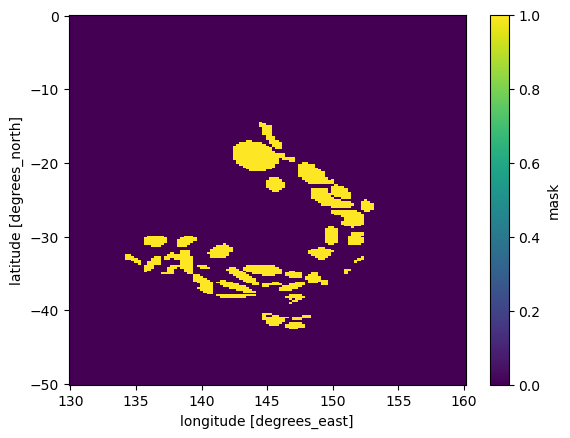

In [95]:
rez_mask.sel(
    lat=slice(0,-50),
    lon=slice(130, 160)
).sum(
    'region'
).plot()

# Convert to `dataset` and save

In [96]:
rez_mask_ds = rez_mask.to_dataset(name='REZ')

In [98]:
rez_mask_ds.to_netcdf('/g/data/w42/dr6273/work/projects/Aus_energy/data/rez_mask_era5_grid.nc')